### Dimensionality Reduction for IBL Neuropixel Data

This notebook is intended to demonstrate the dimensionality reduction code and analysis approaches for IBL neural data. The code is prototype level code from the IBL Code Camp hackathon. In this notebook you will need to set and load data and then you can use the dimensionality reduction functions provided in the dim_reduce.py module. This module needs to be on your python path or in the kernel's execution directory.

In [8]:
# we will append any local directories needed for packages and
# development modules not installed in the conda 'ibllib' environment

# core python
import sys
from pathlib import Path


# sys.path.append(r'C:\Leenoy\Postdoc 1st year\IBL\Code_camp_September_2019\data_code_camp\dim_red_WG\umap-master')
# sys.path.append('/Users/dep/Workspaces/Rodent/IBL/ibllib')
sys.path.append('/Users/alex/Documents/PYTHON/ibl-dimensionality_reduction')
sys.path.append('/Users/alex/Documents/PYTHON/ibllib')



# scientific libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap, MDS, TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import umap
from sklearn.datasets import fetch_openml

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# ibl
import alf.io  
from brainbox.processing import bincount2D
import ibllib.plots as iblplt
import dim_reduce

# data location and loading
Note that we will be converting the data structrures used in the following weeks,
so this code currently uses base alf objects and a dictionaries, but it will be converted
to use Bunch and also Panda Dataframes

In [25]:
# define the path to the sessions we downloaded 
# main_path = Path(r'C:\Leenoy\Postdoc 1st year\IBL\Code_camp_September_2019\data_code_camp')
main_path = Path('/Users/alex/Downloads/')
SES = {
    'A': main_path.joinpath(Path('ZM_1735/2019-08-01/001')), # RSC --> CA1 --> midbrain, good behavior, bad recroding
    'B': main_path.joinpath(Path('ibl_witten_04_002/2019-08-04/002')), # visual cortex, good behavior, noisy recording
    'C': main_path.joinpath(Path('ZM_1736/2019-08-09/004')),  # left probe, bad behavior, good recording
    'D': main_path.joinpath(Path('ibl_witten_04_001/2018-08-11/001')), # motor cortex, bad beahvior, good recording
    'E': main_path.joinpath(Path('KS005/2019-08-29/001')), # activity in in red nucleaus, bad recording (serious lick artifacts and some units saturated) 
#    'F': main_path.joinpath(Path('KS005/2019-08-30/001')), # too large, didnt download for now
}

# select a session from the bunch
sid = 'A'
ses_path = Path(SES[sid])

# read in the alf objects
alf_path = ses_path / 'alf'
spikes = alf.io.load_object(alf_path, 'spikes')  #can be addressed as spikes['time'] or spikes.time
clusters = alf.io.load_object(alf_path, 'clusters')
channels = alf.io.load_object(alf_path, 'channels')
trials = alf.io.load_object(alf_path, '_ibl_trials')
wheel = alf.io.load_object(alf_path, '_ibl_wheel')

2019-09-06 14:46:19.917 WARNING  [io.py:144] Inconsistent dimensions for object:clusters[('mlapdv', (712, 3)), ('amps', (712,)), ('peakChannel', (712,)), ('brainAcronyms', (712, 1)), ('waveformDuration', (712, 712)), ('probes', (712,)), ('depths', (712,)), ('templateWaveforms', (712, 82, 748))]


# functions from dim_reduce


# Parameters for analysis
T_BIN is the size in seconds of the bins applied to the neural data

In [37]:
T_BIN = 0.1
TRIALS_TO_PLOT = np.arange(40,90) # note that we use the real trial numbers
PROJECTED_DIMENSIONS = 3
BEHAVIORAL_VARIABLE = 'choice'

# Prepare the data

In [27]:
binned_data = dim_reduce.bin_types(spikes, trials, wheel, T_BIN, clusters, brain_area = 'MOs5' )

Range of trials:  [1, 390]


In [38]:
neural_data, variable_data = dim_reduce.get_trials(binned_data, BEHAVIORAL_VARIABLE, TRIALS_TO_PLOT)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 27121 but corresponding boolean dimension is 27120

# Principle Components Analysis
The following code cell runs PCA using the wheel velocity for color

In [39]:
pca_projected_data = PCA(n_components=PROJECTED_DIMENSIONS, svd_solver='full').fit_transform(neural_data)
ax = dim_reduce.color_3D_projection(pca_projected_data)
ax.set_title("PCA Guido's RSC --> CA1 --> midbrain recording vs %s" % BEHAVIORAL_VARIABLE, fontsize=18)

TypeError: color_3D_projection() missing 1 required positional argument: 'trial_variable'

# Demixed Principle Components Analysis
The following code cell runs demixed PCA

In [ ]:
# TODO: copy in dPCA

# Factor Analysis

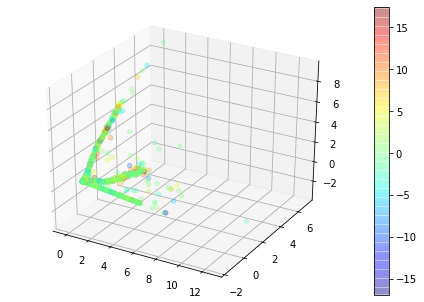

In [17]:
fa_projected_data = FactorAnalysis(n_components=PROJECTED_DIMENSIONS).fit_transform(neural_data)
dim_reduce.color_3D_projection(fa_projected_data, variable_data)